<a href="https://colab.research.google.com/github/TetianaZabolotko/MLtrainings/blob/main/Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regresion

More generally, a linear model makes a prediction by simply computing a weighted
sum of the input features, plus a constant called the bias term (also called the intercept
term)

Linear Regression model prediction
$$ ŷ = θ_0 + θ_1x_1 + θ_2x_2 + ... + θ_nx_n$$

ŷ is the predicted value.

*   ŷ is the predicted value.
*   n is the number of features.
*   $x_i$ is the $i^{th}$ feature value.
*   $θ_j$ is the $j^{th}$ model parameter (including the bias term $θ_0$ and the feature weights $ (θ_1, θ_2, ⋯, θ_n)$.

Linear Regression model prediction (vectorized form)
$$y = h_θx = θ_T · x$$

$h_θ$ is the hypothesis function, using the model parameters $θ$.

Well, recall that
training a model means setting its parameters so that the model best fits the training
set. For this purpose, we first need a measure of how well (or poorly) the model fits
the training data. The most common performance measure
of a regression model is the Root Mean Square Error (RMSE). 
Therefore, to train a Linear Regression model, you need to find the value of $θ$ that minimizes the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE)
than the RMSE, and it leads to the same result (because the value that minimizes a
function also minimizes its square root).

**`MSE cost function`** for a Linear Regression model
$$\texttt{MSE}\,X,h_θ = \frac {1} {m}\sum^m_{i=1}(θ^T \cdot x^{(i)}-y^{(i)})^2$$

To find the value of $θ$ that minimizes the cost function, there is a closed-form solution
— in other words, a mathematical equation that gives the result directly. This is called
the Normal Equation
Normal Equation
$$ θ^{̂} = (X^T⋅X)^{-1}⋅X^{T}⋅y $$

*   $θ^{̂}$ is the value of $\theta$ that minimizes the cost function.
*   $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$.


<function matplotlib.pyplot.show(*args, **kw)>

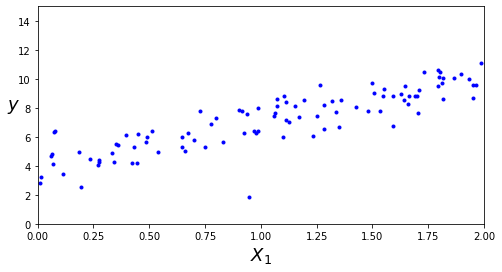

In [2]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

X = 2*np.random.rand(100,1)
#Create an array of the given shape and populate it with random samples 
#from a uniform distribution over [0, 1). 
y = 4 + 3*X + np.random.randn(100,1) # Gaussian noise
# Return a sample (or samples) from the “standard normal” distribution.
# For random samples from the normal distribution with mean mu and standard deviation 
#sigma, use: sigma * np.random.randn(...) + mu


plt.figure(figsize=(8,4))
plt.plot(X,y,'b.')
#plt.legend('top right')
plt.xlabel('$X_1$', fontsize =18)
plt.ylabel('$y$', rotation=0, fontsize =18)
plt.axis([0,2,0,15])
plt.show




In [3]:
X_b = np.c_[np.ones((100,1)), X]
y.shape
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.93082322],
       [3.06738245]])

Predictions using $ θ^̂ $ :

In [4]:
X_new  = np.array([[0], [2]])
X_new.shape

(2, 1)

In [5]:
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.93082322],
       [10.06558813]])

The actual function that we used to generate the data is $ y = 4 + 3x_0 + $ Gaussian noise.

$$y = \begin{pmatrix}
    1 & 0\\
    1 & 2 
\end{pmatrix}  · \begin{pmatrix}
    4.08\\
    2.94 
\end{pmatrix}$$

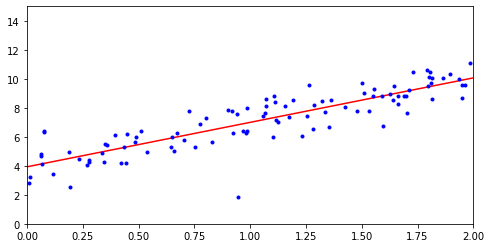

In [6]:
plt.figure(figsize=(8,4))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.93082322]), array([[3.06738245]]))

In [8]:
lin_reg.predict(X_new)

array([[ 3.93082322],
       [10.06558813]])

# Computational Complexity

The Normal Equation computes the inverse of $X^T · X$, which is an $n × n$ matrix
(where $n$ is the number of features). The computational complexity of inverting such a
matrix is typically about $O(n^{2.4})$ to $O(n^3)$ (depending on the implementation).

On the positive side, this equation is linear with regards to the number of instances in
the training set (it is O(m)), so it handles large training sets efficiently, provided they
can fit in memory.

# Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal
solutions to a wide range of problems. The general idea of Gradient Descent is to
tweak parameters iteratively in order to minimize a cost function.

# Batch Gradient Descent

# Stochastic Gradient Descent

# Mini-batch Gradient Descent

# Polynomial Regression

if your data is actually more complex than a simple straight line? Surprisingly,
you can actually use a linear model to fit nonlinear data.
**`Polynomial Regression`** is technique that add powers of each feature as new features, then train a linear model on this extended
set of features.

In [15]:
m=100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
y.shape

(100, 1)

<function matplotlib.pyplot.show(*args, **kw)>

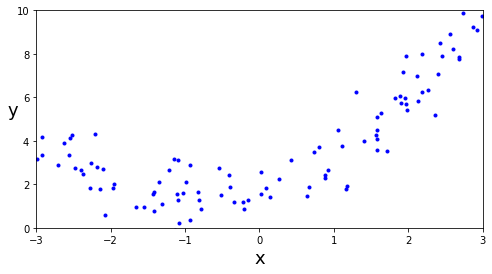

In [22]:
plt.figure(figsize=(8,4))
plt.plot(X,y,'b.')
plt.xlabel('x', fontsize =18)
plt.ylabel('y', rotation =False, fontsize =18)
plt.axis([-3,3,0,10])
plt.show


Generated nonlinear and noisy dataset

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s **`PolynomialFeatures class`** to transform our training data, adding the square (2nd-degree
polynomial) of each feature in the training set as new features (in this case there is
just one feature):

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.92904322])

In [26]:
X_poly[0]

array([-0.92904322,  0.86312131])

X_poly now contains the original feature of X plus the square of this feature.

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.77636098]), array([[0.94552077, 0.57733984]]))

<function matplotlib.pyplot.show(*args, **kw)>

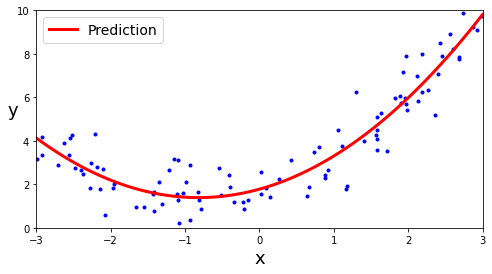

In [33]:

X_new =np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.figure(figsize=(8,4))
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r-', linewidth=3, label='Prediction')
plt.xlabel('x', fontsize =18)
plt.ylabel('y', rotation =False, fontsize =18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3,3,0,10])
plt.show

# Learning Curves

# Regularized Linear Models

# Lasso Regression

# Elastic Net

# Early Stopping

# Logistic Regression

# Training and Cost Function

# Decision Boundaries

# Softmax Regression